In [33]:
# Зависимости
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score

In [34]:
# Инициализируем все известные генераторы случаынйх чисел / Setting all known random seeds
my_code = "Johnson"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

os.environ['PYTHONHASHSEED']=str(my_seed)

random.seed(my_seed)

np.random.seed(my_seed)

In [35]:
# Читаем данные из файла
train_data = pd.read_csv("datasets/pistachio_train_data.csv")

In [36]:
train_data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,-
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,-
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,-
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,-


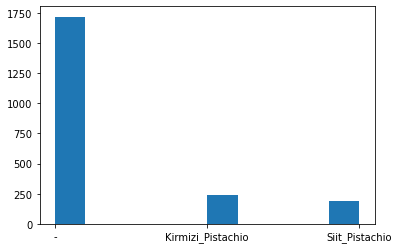

In [37]:
classes = train_data['Class']
plt.hist(classes)
plt.show()

In [38]:
# Значения в числовых столбцах преобразуем к отрезку [0,1].
num_columns = train_data.columns[:-1]
ord_columns = ['Class']

ct = ColumnTransformer(transformers=[('numerical', MinMaxScaler(), num_columns)], remainder='passthrough')

ct.fit(train_data)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', MinMaxScaler(),
                                 Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4'],
      dtype='object'))])

In [39]:
# Преобразуем значения, тип данных приводим к DataFrame
sc_train_data = pd.DataFrame(ct.transform(train_data))

In [40]:
# Устанавливаем названия столбцов
sc_train_data.columns = train_data.columns

In [41]:
sc_train_data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,0.356507,0.374359,0.315832,0.413713,0.657901,0.440817,0.684107,0.372582,0.539674,0.254397,0.299724,0.626524,0.241758,0.448276,0.557169,0.668251,-
1,0.409236,0.57143,0.408421,0.405724,0.715937,0.494734,0.708671,0.42368,0.635809,0.30701,0.189366,0.602389,0.21978,0.344828,0.53125,0.744849,-
2,0.464766,0.20466,0.595693,0.348827,0.834731,0.549439,0.808647,0.447405,0.726094,0.463083,0.611277,0.499378,0.230769,0.206897,0.425184,0.841786,Kirmizi_Pistachio
3,0.438408,0.309433,0.492662,0.330881,0.814781,0.523723,0.911078,0.383085,0.700916,0.430343,0.419155,0.558597,0.21978,0.206897,0.485478,0.937929,-
4,0.533747,0.207288,0.67247,0.350349,0.855588,0.614752,0.927782,0.47591,0.810529,0.501219,0.66571,0.508335,0.208791,0.137931,0.434191,0.958531,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,0.596338,0.157513,0.559513,0.462269,0.733394,0.671756,0.968558,0.52464,0.642675,0.325326,0.854616,0.668325,0.131868,0.172414,0.602757,0.976228,-
2144,0.593238,0.7745,0.539365,0.582761,0.608252,0.668979,0.738394,0.618808,0.589522,0.217143,0.156178,0.684001,0.120879,0.310345,0.620037,0.709984,-
2145,0.757197,0.209447,0.698811,0.552305,0.716618,0.809865,0.984525,0.680653,0.842319,0.307632,0.853583,0.694451,0.0769231,0.103448,0.631618,0.999208,Siit_Pistachio
2146,0.717633,0.1776,0.594878,0.565315,0.65654,0.776913,0.987964,0.639296,0.85529,0.25336,0.91192,0.753421,0.0659341,0.137931,0.698529,0.999736,-


In [42]:
# Отберём данные с метками
sc_train_data_with_labels = sc_train_data[sc_train_data['Class'] != '-']
sc_train_data_with_labels.shape

(430, 17)

In [43]:
# Отберем необходимые параметры
x_train = sc_train_data_with_labels[num_columns]
y_train = (sc_train_data_with_labels[ord_columns].values).flatten()

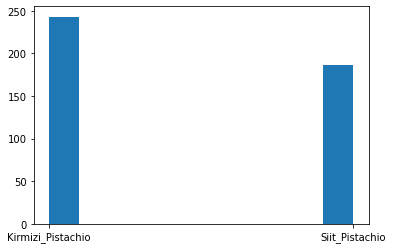

In [44]:
plt.hist(y_train)
plt.show()

In [45]:
# Создадим простую модель логистической регрессии
model = LogisticRegression()

In [46]:
# Обучим модель
model.fit(x_train, y_train)

LogisticRegression()

In [47]:
# Проверим работу обученной модели
pred_y = model.predict(x_train)
f1 = f1_score(y_train, pred_y, average='weighted')
print(f1)

0.8853717582649043


In [48]:
# Отберём данные без меток
sc_train_data_no_labels = sc_train_data[sc_train_data['Class'] == '-']
sc_train_data_no_labels.shape

(1718, 17)

In [49]:
x_train_data_no_labels = sc_train_data_no_labels[num_columns]
x_train_data_no_labels.shape

(1718, 16)

In [50]:
# Вычислим метки
labels = model.predict(x_train_data_no_labels)
labels

array(['Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio', ...,
       'Siit_Pistachio', 'Siit_Pistachio', 'Kirmizi_Pistachio'],
      dtype=object)

In [51]:
# Сформируем итоговый датафрейм
labeled_data = x_train_data_no_labels
labeled_data['Class'] = labels
labeled_data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,0.356507,0.374359,0.315832,0.413713,0.657901,0.440817,0.684107,0.372582,0.539674,0.254397,0.299724,0.626524,0.241758,0.448276,0.557169,0.668251,Kirmizi_Pistachio
1,0.409236,0.57143,0.408421,0.405724,0.715937,0.494734,0.708671,0.42368,0.635809,0.30701,0.189366,0.602389,0.21978,0.344828,0.53125,0.744849,Kirmizi_Pistachio
3,0.438408,0.309433,0.492662,0.330881,0.814781,0.523723,0.911078,0.383085,0.700916,0.430343,0.419155,0.558597,0.21978,0.206897,0.485478,0.937929,Kirmizi_Pistachio
4,0.533747,0.207288,0.67247,0.350349,0.855588,0.614752,0.927782,0.47591,0.810529,0.501219,0.66571,0.508335,0.208791,0.137931,0.434191,0.958531,Kirmizi_Pistachio
6,0.444639,0.319277,0.306342,0.478128,0.575833,0.529843,0.804716,0.426991,0.666328,0.195662,0.410657,0.751928,0.153846,0.37931,0.696691,0.81775,Siit_Pistachio


In [52]:
labeled_data.to_csv('task6_results/pistachio_train_data_labeled.csv', index=False)